In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

In [29]:
# use SimFin free data to predict if a company is a tech company or not to explain machine learning concepts 
# of over/underfitting etc.

# Data free from https://simfin.com/data/bulk

In [30]:
# Set the plotting DPI settings to be a bit higher.
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

# Spot The Tech Company

## 1. Get The Data

In [31]:
import pandas as pd
import numpy as np

industries=pd.read_csv('industries.csv', delimiter=';')

us_companies=pd.read_csv('us-companies.csv', delimiter=';')

us_income_annual=pd.read_csv('us-income-annual.csv', delimiter=';')

In [32]:
industries.head()

,IndustryId,Sector,Industry
0,100001,Industrials,Industrial Products
1,100002,Industrials,Business Services
2,100003,Industrials,Engineering & Construction
3,100004,Industrials,Waste Management
4,100005,Industrials,Industrial Distribution


In [33]:
us_companies.head()

,Ticker,SimFinId,Company Name,IndustryId
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0
1,AA,367153,Alcoa Corp,110004.0
2,AAC_delist,939324,"AAC Holdings, Inc.",106011.0
3,AAL,68568,American Airlines Group Inc.,100006.0
4,AAMC,847094,Altisource Asset Management Corp,104001.0


In [34]:
us_income_annual.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2008,FY,2008-10-31,2008-12-19,2010-12-20,363000000.0,371000000.0,...,20000000.0,-10000000.0,815000000,0.0,815000000,-122000000.0,693000000,NaN,693000000,693000000
1,A,45846,USD,2009,FY,2009-10-31,2009-12-21,2011-12-16,346000000.0,346000000.0,...,-40000000.0,-59000000.0,7000000,0.0,7000000,-38000000.0,-31000000,NaN,-31000000,-31000000
2,A,45846,USD,2010,FY,2010-10-31,2010-12-20,2012-12-20,347000000.0,353000000.0,...,-6000000.0,-76000000.0,560000000,132000000.0,692000000,-8000000.0,684000000,NaN,684000000,684000000
3,A,45846,USD,2011,FY,2011-10-31,2011-12-16,2013-12-19,347000000.0,355000000.0,...,-39000000.0,-72000000.0,1032000000,NaN,1032000000,-20000000.0,1012000000,NaN,1012000000,1012000000
4,A,45846,USD,2012,FY,2012-10-31,2012-12-20,2014-12-22,348000000.0,353000000.0,...,-76000000.0,-92000000.0,1043000000,NaN,1043000000,110000000.0,1153000000,NaN,1153000000,1153000000


## 2. Get The Prediction Classifications We Want From The Data (y)

In [35]:
data = us_income_annual.merge(us_companies, on='SimFinId')
data.head(5)

,Ticker_x,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Ticker_y,Company Name,IndustryId
0,A,45846,USD,2008,FY,2008-10-31,2008-12-19,2010-12-20,363000000.0,371000000.0,...,0.0,815000000,-122000000.0,693000000,NaN,693000000,693000000,A,AGILENT TECHNOLOGIES INC,106001.0
1,A,45846,USD,2009,FY,2009-10-31,2009-12-21,2011-12-16,346000000.0,346000000.0,...,0.0,7000000,-38000000.0,-31000000,NaN,-31000000,-31000000,A,AGILENT TECHNOLOGIES INC,106001.0
2,A,45846,USD,2010,FY,2010-10-31,2010-12-20,2012-12-20,347000000.0,353000000.0,...,132000000.0,692000000,-8000000.0,684000000,NaN,684000000,684000000,A,AGILENT TECHNOLOGIES INC,106001.0
3,A,45846,USD,2011,FY,2011-10-31,2011-12-16,2013-12-19,347000000.0,355000000.0,...,NaN,1032000000,-20000000.0,1012000000,NaN,1012000000,1012000000,A,AGILENT TECHNOLOGIES INC,106001.0
4,A,45846,USD,2012,FY,2012-10-31,2012-12-20,2014-12-22,348000000.0,353000000.0,...,NaN,1043000000,110000000.0,1153000000,NaN,1153000000,1153000000,A,AGILENT TECHNOLOGIES INC,106001.0


In [36]:
# Merge the income statement data rows with the companies data
data = us_income_annual.merge(us_companies, on='SimFinId')

# Identify the companies that are tech companies. 
# Use the "industries" data to find the tech company numerical codes.
data['isTech'] = data['IndustryId'].isin([101001,101002,101003,101004,101005])

# Make the Tech/nonTech split in the data 50/50
dataA=data[data['isTech'] == True].copy()
dataB=data[data['isTech'] == False].sample(dataA.shape[0]).copy()
data = pd.concat([dataA, dataB]) # not the "data" DataFrame is smaller.

print('Rows (instances) of data that we can work with: ', data.shape[0])
print('\nColumns to our data: ', data.shape[1], '\n\nOf which the column keys are:\n' , data.keys())

Rows (instances) of data that we can work with:  7436

Columns to our data:  32 

Of which the column keys are:
 Index(['Ticker_x', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Ticker_y', 'Company Name', 'IndustryId', 'isTech'],
      dtype='object')


## 3. Get The Features We Want From The Data (X)

In [37]:
data2 = pd.DataFrame()

data2['Gross Profit/Rev.'] = data['Gross Profit']/data['Revenue']

data2['Cost of Revenue/Rev.'] = data['Cost of Revenue']/data['Revenue']

data2['Operating Expenses/Rev.'] = data['Operating Expenses']/data['Revenue']

data2['Selling, General & Administrative/Rev.'] = \
    data['Selling, General & Administrative']/data['Revenue']

data2['Research & Development/Rev.'] = \
    data['Research & Development']/data['Revenue']

data2['Operating Income (Loss)/Rev.'] = \
    data['Operating Income (Loss)']/data['Revenue']

data2['Non-Operating Income (Loss)/Rev.'] = \
    data['Non-Operating Income (Loss)']/data['Revenue']

data2['Net Income/Rev.'] = data['Net Income']/data['Revenue']

data2 = data2.fillna(0).clip(-1,1)

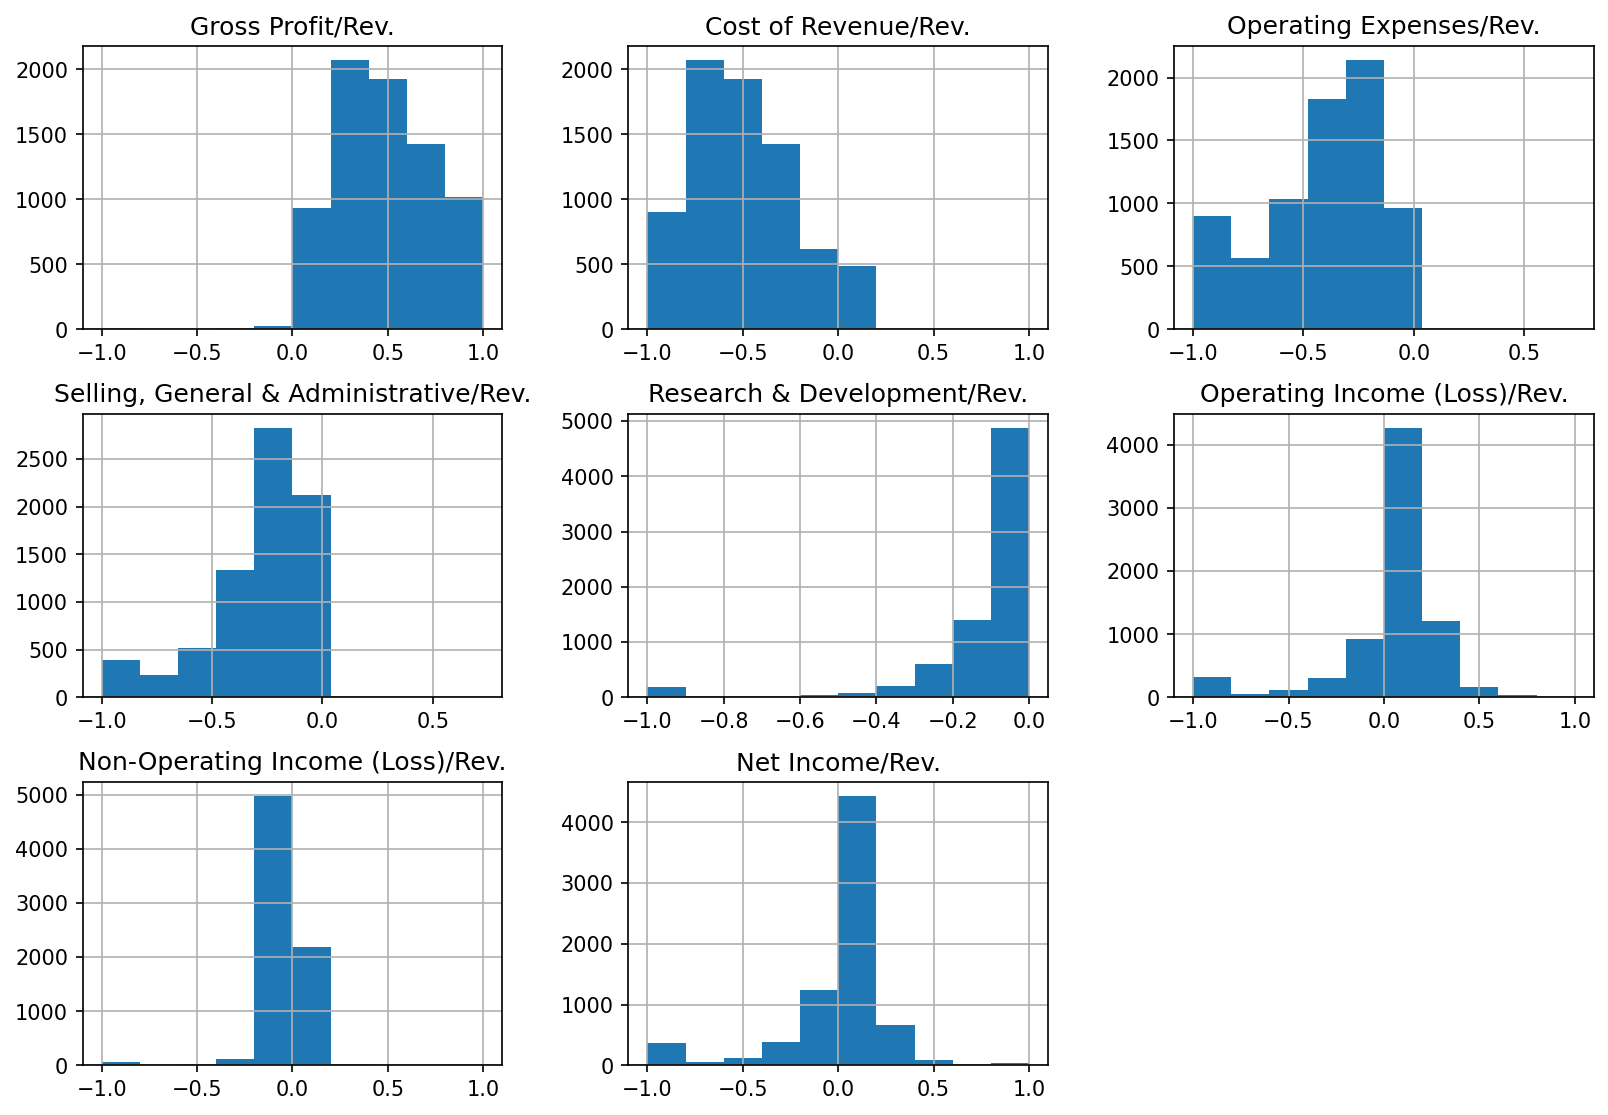

In [38]:
data2.hist(figsize=(13,9));

In [39]:
targets = pd.DataFrame()
targets = data['isTech']
targets.value_counts()

False    3718
True     3718
Name: isTech, dtype: int64

In [40]:
data2.to_csv('techNoTech_X.csv')
targets.to_csv('techNoTech_y.csv')

## 4. Train Our Models On The Data For Prediction

In [41]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

# Learning Curve Function
def plotLearningCurve(clf, X, y, 
                      train_sizes=[0.005, 0.01, 0.015, 0.02, 
                                   0.025, 0.03, 0.035, 0.2], 
                      lowerBetter=False, 
                      marker1='-x', marker2='-o'):
    
    train_sizes, train_scores, valid_scores = \
    learning_curve(clf, X, y, 
                   cv=ShuffleSplit(n_splits=5,
                                   test_size=0.2,
                                   random_state=42),
                   train_sizes=train_sizes)
        
    plt.plot(train_sizes, train_scores.mean(axis=1), marker1)
    plt.fill_between(train_sizes,
                     train_scores.mean(axis=1)-train_scores.std(axis=1),
                     train_scores.mean(axis=1)+train_scores.std(axis=1),
                     alpha=0.2)
    plt.plot(train_sizes, valid_scores.mean(axis=1), marker2)
    plt.fill_between(train_sizes,
                     valid_scores.mean(axis=1)-valid_scores.std(axis=1),
                     valid_scores.mean(axis=1)+valid_scores.std(axis=1),
                     alpha=0.2)
    if lowerBetter:
        plt.gca().invert_yaxis()

    plt.grid()
    
# Validation Curve Function
def plotValidationCurve(clf, X, y, varName, 
                        variableVals = [2, 4, 6, 12, 15, 20], 
                        lowerBetter=False):

    train_scores, valid_scores = \
    validation_curve(clf, data2, targets, 
                     param_name = varName,
                     param_range = variableVals,
                     cv=ShuffleSplit(n_splits=5,
                                     test_size=0.2,
                                     random_state=42))
    
        
    plt.plot(variableVals, train_scores.mean(axis=1), '-x')
    plt.fill_between(variableVals,
                     train_scores.mean(axis=1)-train_scores.std(axis=1),
                     train_scores.mean(axis=1)+train_scores.std(axis=1),
                     alpha=0.2)
    plt.plot(variableVals, valid_scores.mean(axis=1), '-o')
    plt.fill_between(variableVals,
                     valid_scores.mean(axis=1)-valid_scores.std(axis=1),
                     valid_scores.mean(axis=1)+valid_scores.std(axis=1),
                     alpha=0.2)
    if lowerBetter:
        plt.gca().invert_yaxis()

    plt.grid()

## 4.1 Learning/Validation Curves For A Decision Tree

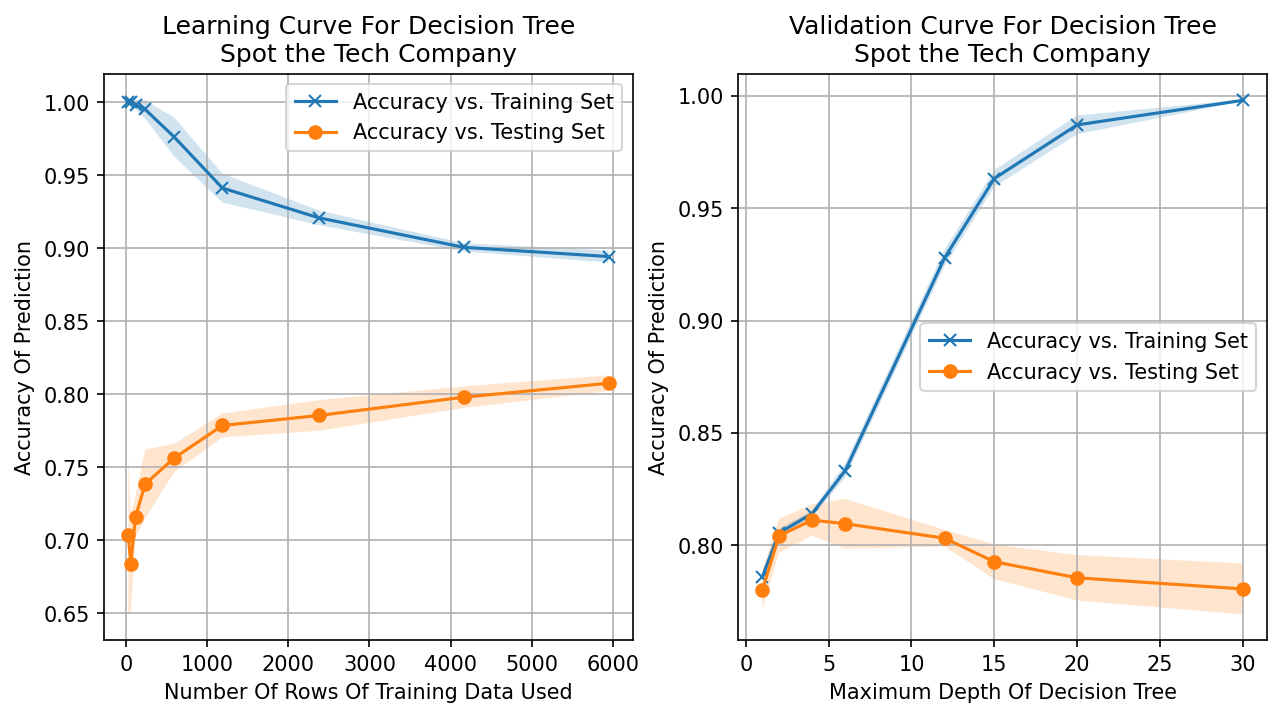

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=10)
train_sizes=[0.005, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 0.7, 1]

plt.figure(figsize=(10,5))

# learning curve - check if data is OK
plt.subplot(1,2,1)
plotLearningCurve(clf, data2, targets, train_sizes)
plt.title('Learning Curve For Decision Tree\nSpot the Tech Company')
plt.xlabel('Number Of Rows Of Training Data Used')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

# validation curve - check if model is learning from the data optimally
plt.subplot(1,2,2)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=10)
plotValidationCurve(clf, data2, targets, 'max_depth', 
                    variableVals = [1, 2, 4, 6, 12, 15, 20, 30])
plt.title('Validation Curve For Decision Tree\nSpot the Tech Company')
plt.xlabel('Maximum Depth Of Decision Tree')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

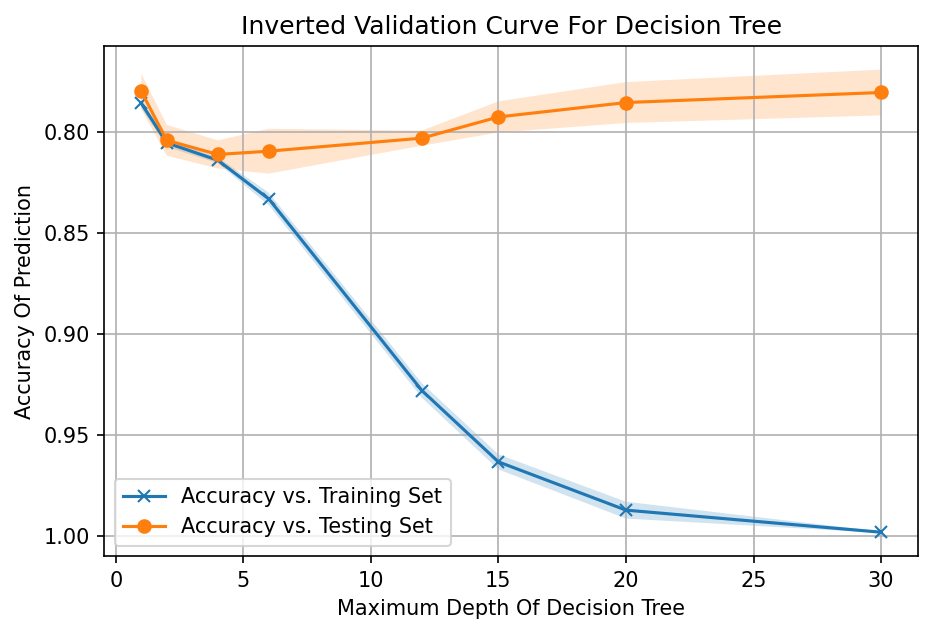

In [43]:
# validation curve - check if model is learning from the data optimally
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=10)
plotValidationCurve(clf, data2, targets, 'max_depth', 
                    variableVals = [1, 2, 4, 6, 12, 15, 20, 30], lowerBetter=True)
#plt.yscale('log')
plt.title('Inverted Validation Curve For Decision Tree')
plt.xlabel('Maximum Depth Of Decision Tree')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

# Diagnosis with Learning/Validation Curves
### What If There Isn't Enough Data?

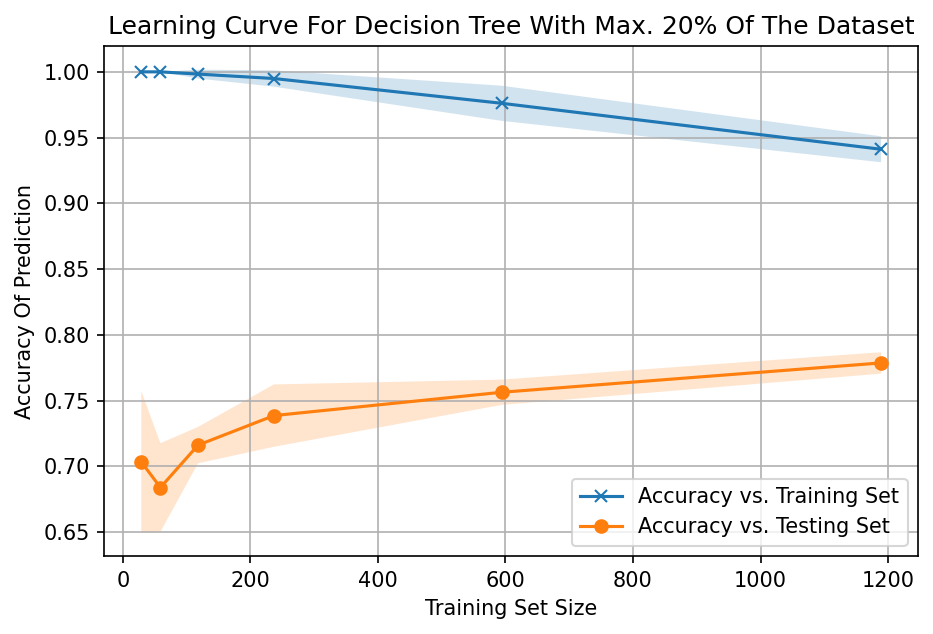

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=10)
train_sizes=[0.005, 0.01, 0.02, 0.04, 0.1, 0.2]
plotLearningCurve(clf, data2, targets, train_sizes)
plt.title('Learning Curve For Decision Tree With Max. 20% Of The Dataset')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

### What If The Data Isn't Good Quality?

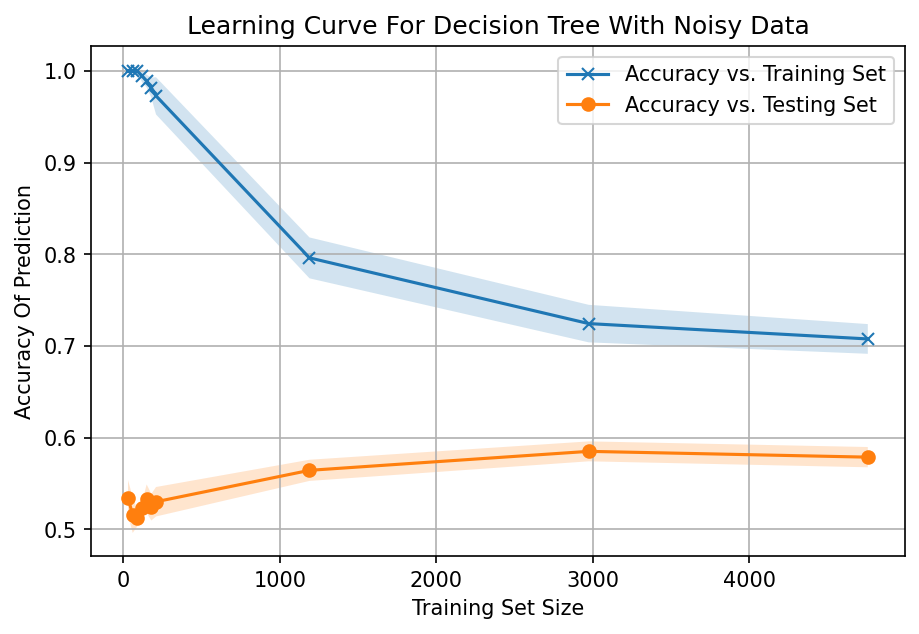

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=10)

train_sizes=[0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.2, 0.5, 0.8]
plotLearningCurve(clf, 
                  data2 + np.random.rand(data2.shape[0], data2.shape[1]), 
                  targets, 
                  train_sizes) # lower accuracy

plt.title('Learning Curve For Decision Tree With Noisy Data')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

### Is The Model Overfitting, With High Variance? Is It Bad?

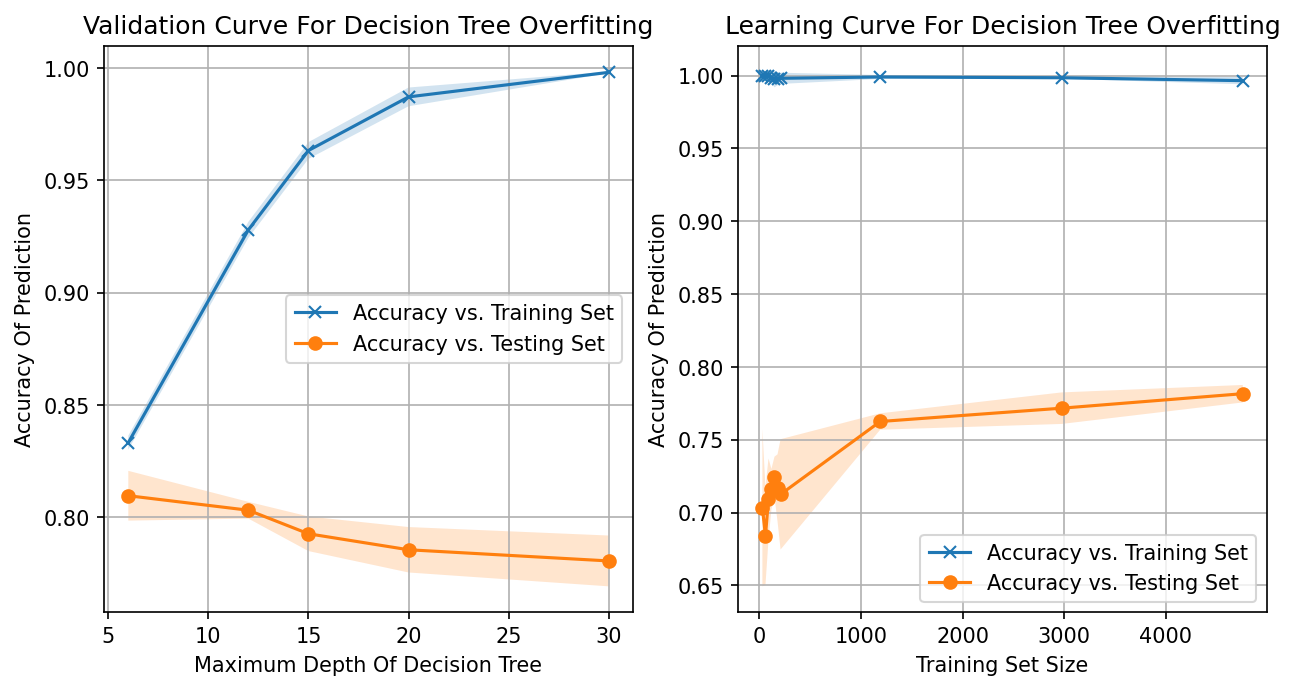

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=10)
plt.figure(figsize=(10,5))

# validation curve, trying large max_depth to decision trees
plt.subplot(1,2,1)
plotValidationCurve(clf, 
                    data2, 
                    targets, 
                    'max_depth', 
                    variableVals = [6, 12, 15, 20, 30])

plt.title('Validation Curve For Decision Tree Overfitting')
plt.xlabel('Maximum Depth Of Decision Tree')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

# learning curve, for a decision tree that is obviously overfitting the data
plt.subplot(1,2,2)
clf = DecisionTreeClassifier(random_state=42, 
                             max_depth=30)

train_sizes=[0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.2, 0.5, 0.8]

plotLearningCurve(clf, 
                  data2, 
                  targets, 
                  train_sizes)

plt.title('Learning Curve For Decision Tree Overfitting')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

### Is The Model Underfitting, With High Bias?

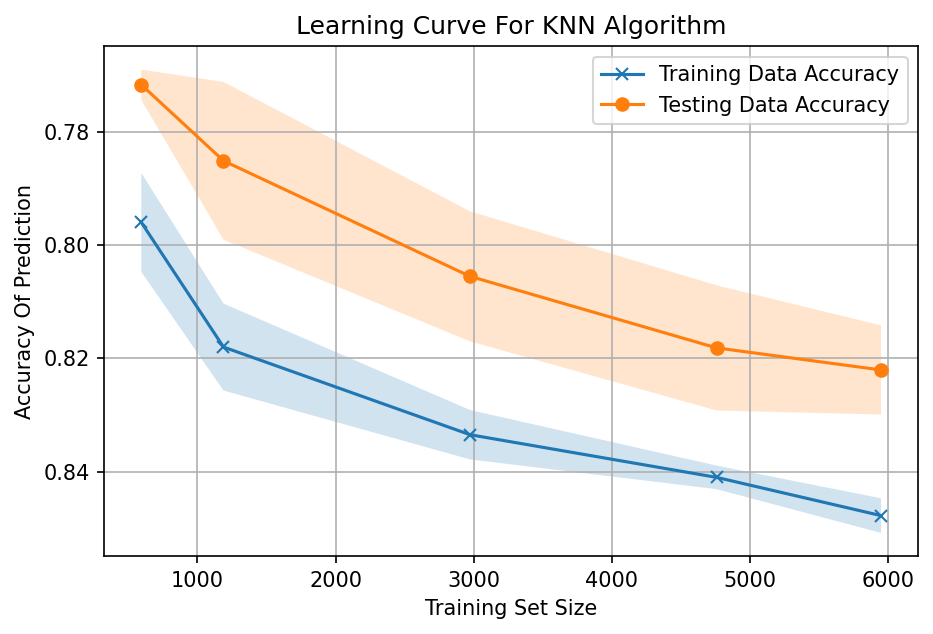

In [47]:
# Try the KNN regressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# High K and low K-Nearest Neighbours
clf1 = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=10))

train_sizes=[0.1, 0.2, 0.5, 0.8, 1]
plotLearningCurve(clf1, data2, targets, train_sizes, marker1='-x', marker2='-o', lowerBetter=True)
plt.title('Learning Curve For KNN Algorithm')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Training Data Accuracy','Testing Data Accuracy'])

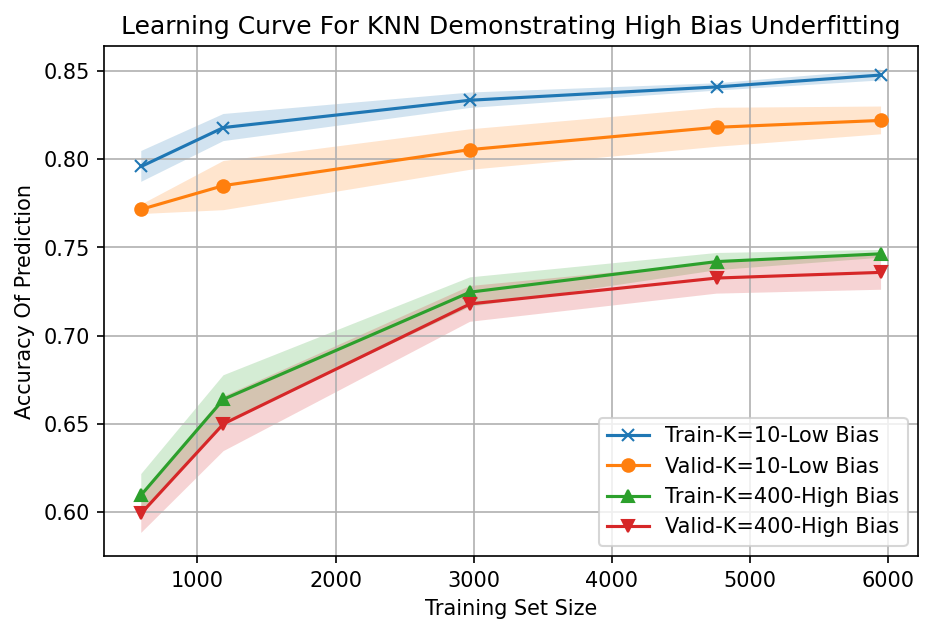

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# High K and low K-Nearest Neighbours
clf1 = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=10))

clf2 = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=400))

train_sizes=[0.1, 0.2, 0.5, 0.8, 1]
plotLearningCurve(clf1, data2, targets, train_sizes, marker1='-x', marker2='-o')
plotLearningCurve(clf2, data2, targets, train_sizes, marker1='-^', marker2='-v')
plt.title('Learning Curve For KNN Demonstrating High Bias Underfitting')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Train-K=10-Low Bias','Valid-K=10-Low Bias','Train-K=400-High Bias','Valid-K=400-High Bias'])
plt.grid()

### Is Everything Optimal? The Bias-Variance Tradeoff

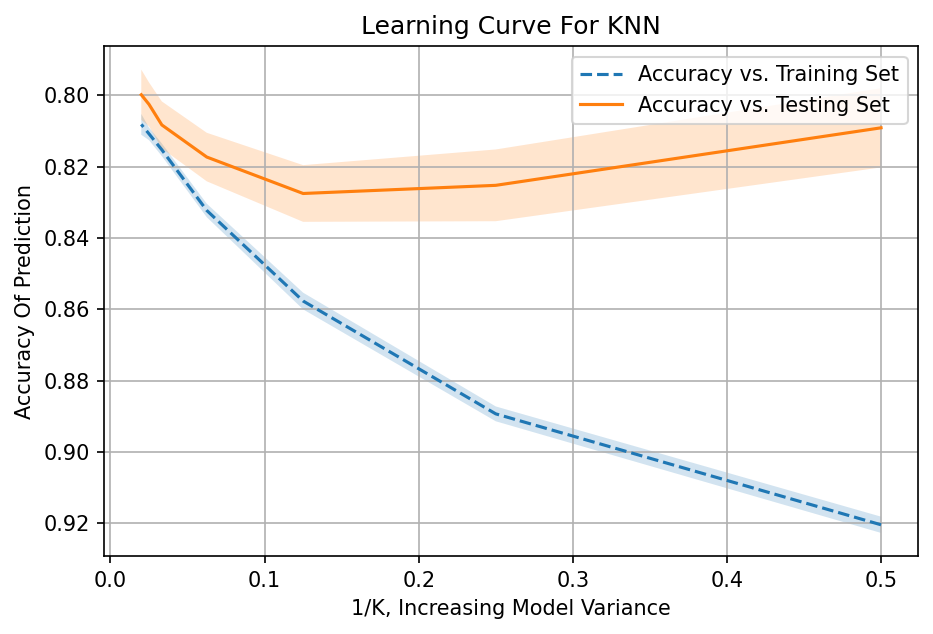

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

clf = make_pipeline(StandardScaler(),
                    KNeighborsClassifier(n_neighbors=5))

variableVals = [2, 4, 8, 16, 30, 40, 50] # KNN increase k, variance goes down.

train_scores, valid_scores = \
validation_curve(clf, data2, targets,
                 param_name = 'kneighborsclassifier__n_neighbors',
                 param_range = variableVals,
                 cv=ShuffleSplit(n_splits=5,
                                 test_size=0.2,
                                 random_state=42))

variableVals=[1/i for i in variableVals]
plt.plot(variableVals, train_scores.mean(axis=1),'--')
plt.fill_between(variableVals,
                 train_scores.mean(axis=1)-train_scores.std(axis=1),
                 train_scores.mean(axis=1)+train_scores.std(axis=1), 
                 alpha=0.2)
plt.plot(variableVals, valid_scores.mean(axis=1))
plt.fill_between(variableVals,
                 valid_scores.mean(axis=1)-valid_scores.std(axis=1),
                 valid_scores.mean(axis=1)+valid_scores.std(axis=1), 
                 alpha=0.2)
plt.gca().invert_yaxis()
plt.grid()
plt.title('Learning Curve For KNN')
plt.xlabel('1/K, Increasing Model Variance')
plt.ylabel('Accuracy Of Prediction')
plt.legend(['Accuracy vs. Training Set', 'Accuracy vs. Testing Set'])

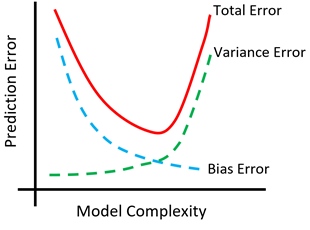

# See Some Predictions

In [52]:
clf = make_pipeline(StandardScaler(),
                    KNeighborsClassifier(n_neighbors=5)).fit(data2, targets)

In [53]:
clf = make_pipeline(StandardScaler(),
                    KNeighborsClassifier(n_neighbors=5)).fit(data2, targets)

msftData = {'Gross Profit/Rev.':[96937/143015],
        'Cost of Revenue/Rev.':[46078/143015],
        'Operating Expenses/Rev.':[(19269+19598+5111)/143015],
        'Selling, General & Administrative/Rev.':[5111/143015],
        'Research & Development/Rev.':[19269/143015],
        'Operating Income (Loss)/Rev.':[52959/143015],
        'Non-Operating Income (Loss)/Rev.':[77/143015],
        'Net Income/Rev.':[44281/143015]}

msft = pd.DataFrame(msftData)
msft = msft.fillna(0).clip(-1,1)

clf.predict(msft)

array([False])

In [54]:
def createMyRatios(inputCompanyData):
    companyRatios = pd.DataFrame()

    companyRatios['Gross Profit/Rev.'] = \
    inputCompanyData['Gross Profit']/inputCompanyData['Revenue']

    companyRatios['Cost of Revenue/Rev.'] = \
    inputCompanyData['Cost of Revenue']/inputCompanyData['Revenue']

    companyRatios['Operating Expenses/Rev.'] = \
    inputCompanyData['Operating Expenses']/inputCompanyData['Revenue']

    companyRatios['Selling, General & Administrative/Rev.'] = \
    inputCompanyData['Selling, General & Administrative']/\
        inputCompanyData['Revenue']

    companyRatios['Research & Development/Rev.'] = \
    inputCompanyData['Research & Development']/inputCompanyData['Revenue']

    companyRatios['Operating Income (Loss)/Rev.'] = \
    inputCompanyData['Operating Income (Loss)']/inputCompanyData['Revenue']

    companyRatios['Non-Operating Income (Loss)/Rev.'] = \
    inputCompanyData['Non-Operating Income (Loss)']/inputCompanyData['Revenue']

    companyRatios['Net Income/Rev.'] = \
    inputCompanyData['Net Income']/inputCompanyData['Revenue']

    return companyRatios.fillna(0).clip(-1,1)

In [55]:
nonTechCompany = data[data['Ticker_x']=='MCD'] #MCD, KO, BRKA, etc.

clf.predict(createMyRatios(nonTechCompany))

array([False, False, False])

In [56]:
techCompany = data[data['Ticker_x']=='AAPL'] #AAPL, AMD, GOOG, etc.

clf.predict(createMyRatios(techCompany))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True])